In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For validation
from sklearn.model_selection import train_test_split as split

# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# For boosting
from sklearn.ensemble import AdaBoostClassifier

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [27]:
## Import the dataset
df = pd.read_csv('data.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [28]:
# Remove duplicated
df = df[~df.duplicated()==1]

In [29]:
# Transform milliseconds to minutes
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)


In [30]:
# Checking null value in dataset
df.isnull().sum()

acousticness        0
artists             0
danceability        0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_mins       0
dtype: int64

In [31]:
## Drop unnecessary columns 
track_features = df.copy()


track_features = track_features.drop(["artists","duration_mins","explicit","id","instrumentalness","key","mode","name","popularity","release_date","speechiness","tempo","year"], axis=1)
# data.loc[(df.energy >= 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Happy'
# data.loc[(df.energy >= 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Angry'
# data.loc[(df.energy < 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Calm'
# data.loc[(df.energy < 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Sad'

# data.loc[(data.mood == 'Happy'), "mood_type" ] = 0
# data.loc[(data.mood == 'Sad'), "mood_type" ] = 1
# data.loc[(data.mood == 'Angry'), "mood_type" ] = 2
# data.loc[(data.mood == 'Calm'), "mood_type" ] = 3
# data
km = KMeans(n_clusters=4)
km.fit(track_features)

track_features

,acousticness,danceability,energy,liveness,loudness,valence
0,0.9950,0.708,0.1950,0.1510,-12.428,0.7790
1,0.9940,0.379,0.0135,0.0763,-28.454,0.0767
2,0.6040,0.749,0.2200,0.1190,-19.924,0.8800
3,0.9950,0.781,0.1300,0.1110,-14.734,0.7200
4,0.9900,0.210,0.2040,0.0980,-16.829,0.0693
...,...,...,...,...,...,...
169904,0.1730,0.875,0.4430,0.0891,-7.461,0.3060
169905,0.0167,0.719,0.3850,0.1110,-10.907,0.2700
169906,0.5380,0.514,0.5390,0.1080,-9.332,0.1530
169907,0.0714,0.646,0.7610,0.2220,-2.557,0.4720


In [32]:
output_km = km.predict(track_features)
df['label'] = output_km
id = ['05TpY5Fov3Hgfp8V1KILZ8', '0KVEBQA98JvkmB5ZydQ13k', '6XQHlsNu6so4PdglFkJQRJ', '1GxNPd5r7D1zChEMuMhue0','64FxpKdU055iIaMDY441Qc','7wOv2XP17ZZHzEWoBmbi9t']

# Create a list of indices corresponding to the artists above
# The first comprehension creates a list of lists, the second flattens it into one
to_drop = [df[df.id == i].index.tolist() for i in id]
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases
df_x = df.copy()
cases = df_x[df_x.index.isin(to_drop)]

# Remove the test cases from data
df.drop(to_drop, inplace=True)


columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

In [33]:
# cheerful/energetic mood
for column in columns:
    print(column, df[df['label'] == 0][column].mean())
(df[df['label'] == 0].tail(10))

danceability 0.4913497461790392
energy 0.24511602393831877
loudness -16.734600573144107
acousticness 0.7431277864014737
valence 0.4435517740174672


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169551,0.125000,['Sample Rain Library'],0.1120,0.53600,0,5fhZ8Pd7ieNCeebaLZDjN3,0.96500,0,0.3850,-20.181,0,Ambiente Lluvia,64,2017-04-12,0.0720,95.393,0.02370,2017,4.290550,0
169558,0.140000,['Winds and Oceans'],0.0928,0.90600,0,11Od1tdNLkqgIjGwvFGUen,0.97300,0,0.3060,-20.669,0,Wet Dreams of Rain,64,2017-04-12,0.1040,88.076,0.02360,2017,4.757750,0
169560,0.140000,['Sample Rain Library'],0.1460,0.00279,0,6IMPIkbRTfw1GIb4w270Vr,0.99400,2,0.8850,-19.075,0,Dark Rain Sound,64,2017-04-12,0.0676,106.126,0.00001,2017,3.634167,0
169569,0.121000,['Rain Storm Sample Library'],0.1530,0.99600,0,1LjsSXsKZ4mi7eP6NA8Au8,0.99900,10,0.7550,-16.574,0,Serenity Rain,64,2017-04-12,0.0470,94.976,0.00001,2017,2.950367,0
169576,0.737000,['XXXTENTACION'],0.5700,0.28500,1,5xbrhx2tMMcN68IT3cJbhS,0.01330,9,0.1080,-14.125,0,Ayala (Outro),65,2017-08-25,0.0381,83.485,0.09730,2017,1.661783,0
169584,0.733000,"['prxz', 'Shiloh Dynasty']",0.8250,0.20500,0,71wDmInTs45Pb2ggtLcc71,0.00086,9,0.0982,-15.117,1,Cigarettes and Sex,66,2017-10-21,0.2330,93.906,0.44900,2017,2.000983,0
169598,0.168000,['Ocean Makers'],0.1660,0.09450,0,7HgBLJT1daE6jTNJ1bnCPF,0.95700,9,0.4910,-15.351,1,Pacific Rest Ocean,62,2017-05-06,0.0764,118.932,0.00001,2017,2.834133,0
169717,0.004120,['The Outdoor Library'],0.1280,0.38900,0,1ODtZW4pDlZtl0UyPg0ax3,0.98800,2,0.4570,-20.070,0,Sounds of Nature: Thunder,68,2019-10-10,0.0639,95.252,0.02240,2019,2.779833,0
169743,0.000013,['Naturaleza FX'],0.0000,0.00002,0,4UFlnhDTGyKvlhOQziDHkG,0.20800,1,0.3110,-16.873,1,Colors of the Rain,68,2019-10-10,0.0000,0.000,0.00000,2019,2.514650,0
169791,0.024100,['Mulatto'],0.8630,0.23500,1,6tLWt7gkvvTSjS6OfJjiyJ,0.00000,1,0.1230,-15.545,1,B*tch From Da Souf,65,2019-01-14,0.6990,150.062,0.39900,2019,2.400800,0


In [34]:
# romantic 
for column in columns:
    print(column, df[df['label'] == 1][column].mean())
df[df['label'] == 1].tail(20)

danceability 0.5501273479420364
energy 0.4706290188959934
loudness -11.081116714327026
acousticness 0.5289818671956431
valence 0.5760962891446839


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169811,0.8910,['Lennon Stella'],0.440,0.306,0,15VDHAMS4JCLziCjNkmQl1,0.000000,9,0.1030,-8.947,1,Older Than I Am,69,2020-04-24,0.0363,117.288,0.2010,2020,3.025550,1
169823,0.2440,['Don Omar'],0.817,0.667,0,4AbTOGtRCtPK2IXsDiCzMF,0.011800,9,0.2580,-9.182,0,"No Se De Ella ""My Space""",2,2020-06-12,0.0920,88.011,0.7760,2020,3.711333,1
169826,0.9210,['ROSALÍA'],0.442,0.267,0,76WMWYa1iqRTHZotPuuEuc,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020,3.566867,1
169829,0.3230,['Hailee Steinfeld'],0.621,0.427,0,04fBskFuMgIx0T0ob7uIhd,0.000008,11,0.1350,-9.733,0,End This (L.O.V.E.),71,2020-05-08,0.3330,192.183,0.4080,2020,3.053633,1
169839,0.8150,"['Freddie Gibbs', 'The Alchemist', 'Rick Ross']",0.523,0.654,1,15NQ3x1f2GUhqs8oBXhTqp,0.000008,6,0.2110,-9.531,0,Scottie Beam,67,2020-05-29,0.2160,79.192,0.5440,2020,4.067550,1
169840,0.7410,"['Freddie Gibbs', 'The Alchemist']",0.543,0.551,1,5V9lnDn1hePoudMfKfCTNl,0.000054,1,0.5830,-10.380,1,God Is Perfect,67,2020-05-29,0.4370,75.932,0.6380,2020,3.983783,1
169843,0.7870,"['Sleepy Hallow', 'Sheff G']",0.812,0.385,1,3m49rgJQUz5GU07RWjf5SH,0.000000,10,0.1030,-9.676,0,Molly (feat. Sheff G),62,2020-06-05,0.4160,133.993,0.7420,2020,2.742700,1
169846,0.9730,['Ellie Goulding'],0.415,0.262,0,1GofdWoWnV6F7sozQfoE79,0.000003,9,0.1060,-12.530,1,I Know You Care,2,2020-06-12,0.0333,105.861,0.3110,2020,3.456217,1
169851,0.9730,['Ellie Goulding'],0.415,0.262,0,6lMqDaZjoqe6J1p8TdHuBZ,0.000003,9,0.1060,-12.530,1,I Know You Care,4,2020-06-05,0.0333,105.861,0.3110,2020,3.456217,1
169859,0.1190,['Tiagz'],0.960,0.412,0,42EG9CclEoBnRq7X5B7O9j,0.000000,1,0.0903,-11.281,1,My Heart Went Oops,72,2020-01-29,0.6070,121.027,0.4900,2020,2.148767,1


In [35]:
# lyrical/Chill mood
for column in columns:
    print(column, df[df['label'] == 2][column].mean())
df[df['label'] == 2].tail(38)

danceability 0.5808628780358679
energy 0.7236548428595063
loudness -5.997272185824896
acousticness 0.23777698817417778
valence 0.5836391620342797


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169858,0.00153,"['ILLENIUM', 'Excision', 'I Prevail']",0.428,0.877,0,5dAtKXyrQoQW054LZqJ5dP,0.003720,5,0.0943,-4.722,0,Feel Something (With I Prevail),67,2020-04-03,0.0835,75.518,0.1130,2020,3.683333,2
169860,0.17100,"['Blueface', 'DaBaby']",0.914,0.583,1,5eViBefGU8Fm9OAeJVZJjW,0.000000,7,0.1390,-7.912,0,Obama (feat. DaBaby),68,2020-03-13,0.4520,134.882,0.5880,2020,2.134000,2
169861,0.76000,['Giveon'],0.640,0.355,0,6qBFSepqLCuh5tehehc1bd,0.000070,10,0.1140,-7.757,0,LIKE I WANT YOU,68,2020-03-27,0.0650,119.513,0.4370,2020,4.346267,2
169862,0.09620,['Ellie Goulding'],0.535,0.648,0,6smYfKpqsvpmqBXkLjYGJo,0.000000,10,0.1180,-4.479,1,Power,73,2020-05-21,0.1590,162.084,0.5110,2020,3.188883,2
169864,0.00480,"['Eminem', 'Don Toliver']",0.756,0.747,1,1lO9CZo6eDrOy0S7khgryG,0.005360,9,0.5880,-5.407,1,No Regrets (feat. Don Toliver),70,2020-01-17,0.0460,134.935,0.0687,2020,3.349117,2
169866,0.25500,"['Myke Towers', 'Yandel']",0.808,0.736,0,1OW47kPsWJfvhcQ7V7XwhC,0.000273,9,0.1050,-4.084,0,Mayor,67,2020-06-08,0.1140,89.983,0.8060,2020,2.184250,2
169868,0.14800,['Sam Hunt'],0.641,0.644,0,2Q04BmXs7Sr7ThizTmERj6,0.000000,1,0.0791,-5.853,1,Young Once,65,2020-04-03,0.0340,105.941,0.4710,2020,3.088883,2
169869,0.57800,['Taylor Swift'],0.502,0.462,0,3fGnrtrtL1IHSX9t4DKOYf,0.000000,11,0.7210,-7.526,1,Cornelia Street - Live From Paris,70,2020-05-18,0.0265,97.085,0.3040,2020,4.933550,2
169870,0.03440,['Brantley Gilbert'],0.308,0.616,0,2AqbOAAgaNRygNIJYcM69I,0.000004,8,0.1020,-6.947,1,Hard Days,61,2020-06-05,0.0363,72.273,0.4100,2020,2.973650,2
169872,0.10600,['Sean Paul'],0.951,0.600,0,6QvolntlpSFucqR9f91AoK,0.000000,0,0.0712,-4.675,0,Temperature,1,2020-06-12,0.0686,125.040,0.8220,2020,3.642883,2


In [36]:
# sadboy mood
for column in columns:
    print(column, df[df['label'] == 3][column].mean())
df[df['label'] == 3].tail(7)

danceability 0.3856157098269176
energy 0.09428571240896623
loudness -25.198756833443678
acousticness 0.8768724866395535
valence 0.2853428210536272


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169579,0.131000,"['Rain Sounds', 'Sleep Sounds of Nature', 'Zen...",0.177,0.99900,0,0GJMLR5EzMRcHqSZkGQI7R,0.575,11,0.4810,-21.618,0,"Soothing Rain(Loopable,No fade)",64,2017-04-07,0.0621,101.377,0.00166,2017,2.882450,3
169609,0.996000,['Réka Ioescu'],0.391,0.00241,0,3Se2ifaSm69Np4OtyaNNKa,0.949,7,0.1340,-30.569,1,Endymion,68,2018-09-29,0.0790,67.191,0.38800,2018,2.537183,3
169710,0.862000,['Pathos Humano'],0.180,0.10300,0,6eck4C7AFDsmv8AAwozNa1,0.779,5,0.0903,-26.940,1,Sangre,68,2019-06-22,0.0400,145.274,0.03860,2019,3.766667,3
169737,0.000101,['Shaman'],0.147,0.33500,0,50CgKxfyJhZZFMTfbYBE6E,0.679,1,0.1110,-24.715,1,Tears of the City,68,2019-09-03,0.0408,140.774,0.09790,2019,2.133333,3
169755,0.153000,['Factorial FX'],0.132,0.15200,0,5PXuSSMvae2tJuQj78DR5d,0.966,5,0.1360,-26.433,1,Soft Rain Pouring,69,2019-09-30,0.0559,142.521,0.03490,2019,2.868050,3
169770,0.957000,['Granular'],0.000,0.14800,0,4rkUd5Juj2icJoNTLq0jmP,0.168,5,0.1120,-22.012,1,Brown Noise 750 LPF,69,2019-01-11,0.0000,0.000,0.00000,2019,2.434350,3
169796,0.974000,['Elevie J'],0.155,0.05150,0,0MAXHRBvH3yjPrmaIk0ela,0.952,10,0.1060,-26.058,1,Wading in dreams,68,2019-09-18,0.0434,71.405,0.03710,2019,1.858700,3


C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

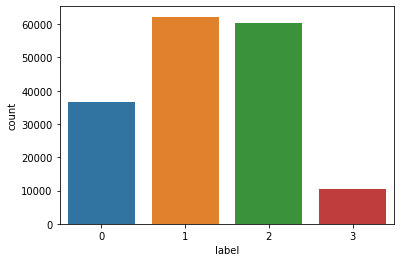

In [37]:
# Visualize number of data point for each class
# df.loc[(df.label == 0), "mood_type" ] = 'Happy'
# df.loc[(df.label == 1), "mood_type" ] = 'Romantic'
# df.loc[(df.label == 2), "mood_type" ] = 'Chill'
# df.loc[(df.label == 3), "mood_type" ] = 'Sad'
sns.countplot(df['label'])

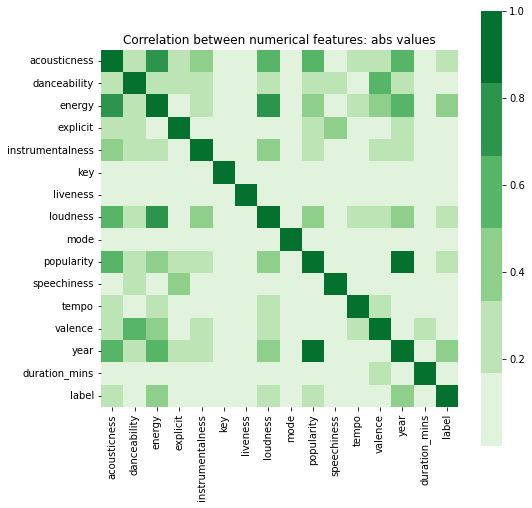

In [38]:
numeric_columns = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)

corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [39]:

# Feature engineering
X = track_features
# Mapping class label to respected integer
y = output_km
target_names = ['Happy', 'Romantic', 'Chill', 'Sad']


In [40]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

In [41]:
results = []

def run_model(model, alg_name):
   # build the model on training data
   model.fit(X_train, y_train)
 
   # make predictions for test data
   y_pred = model.predict(X_test)
   # calculate the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)
   Cr = classification_report(y_test, y_pred, target_names=target_names)
   results.append((alg_name, accuracy, model))
   print("Model: ", alg_name)
   print("Accuracy on Test Set for {} = {:.2f}\n".format(alg_name,accuracy))
   print(Cr)
   print("{}: CrossVal Accuracy Mean: {:.2f} and Standard Deviation: {:.2f} \n".format(alg_name,scoresDT3.mean(), scoresDT3.std()))

In [42]:
model = DecisionTreeClassifier()
run_model(model, "Decision Tree")

Model:  Decision Tree
Accuracy on Test Set for Decision Tree = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      9130
    Romantic       1.00      1.00      1.00     15516
       Chill       1.00      1.00      1.00     15169
         Sad       1.00      1.00      1.00      2663

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Decision Tree: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [43]:
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

Model:  Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      9130
    Romantic       0.99      0.99      0.99     15516
       Chill       1.00      1.00      1.00     15169
         Sad       1.00      1.00      1.00      2663

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [44]:
model = LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100)
run_model(model, "Logistic Regression")

C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.94

              precision    recall  f1-score   support

       Happy       0.92      0.89      0.91      9130
    Romantic       0.93      0.96      0.94     15516
       Chill       0.98      0.96      0.97     15169
         Sad       0.88      0.86      0.87      2663

    accuracy                           0.94     42478
   macro avg       0.93      0.92      0.92     42478
weighted avg       0.94      0.94      0.94     42478

Logistic Regression: CrossVal Accuracy Mean: 0.95 and Standard Deviation: 0.01 



C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
dt_b = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=dt_b)
run_model(model, "Adaboost Classifier")

Model:  Adaboost Classifier
Accuracy on Test Set for Adaboost Classifier = 0.93

              precision    recall  f1-score   support

       Happy       0.77      1.00      0.87      9130
    Romantic       1.00      1.00      1.00     15516
       Chill       1.00      1.00      1.00     15169
         Sad       0.00      0.00      0.00      2663

    accuracy                           0.93     42478
   macro avg       0.69      0.75      0.72     42478
weighted avg       0.89      0.93      0.91     42478

Adaboost Classifier: CrossVal Accuracy Mean: 0.93 and Standard Deviation: 0.00 



C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

In [46]:
model = SVC(kernel='poly', degree=3, C=1)
run_model(model, "SVM Classifier")

Model:  SVM Classifier
Accuracy on Test Set for SVM Classifier = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      9130
    Romantic       1.00      1.00      1.00     15516
       Chill       1.00      1.00      1.00     15169
         Sad       1.00      1.00      1.00      2663

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

SVM Classifier: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [47]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      9130
    Romantic       1.00      1.00      1.00     15516
       Chill       1.00      1.00      1.00     15169
         Sad       1.00      1.00      1.00      2663

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Random Forest: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [48]:
from tabulate import tabulate

print("Classification Results")
rows = list()

for res in results:
    rows.append([res[0], res[1] ])
    
tab = tabulate(rows, headers=['Algorithm', 'Accuracy'], tablefmt='fancy_grid')
print(tab)

Classification Results
╒══════════════════════════════╤════════════╕
│ Algorithm                    │   Accuracy │
╞══════════════════════════════╪════════════╡
│ Decision Tree                │   0.999011 │
├──────────────────────────────┼────────────┤
│ Nearest Neighbors Classifier │   0.99581  │
├──────────────────────────────┼────────────┤
│ Logistic Regression          │   0.942606 │
├──────────────────────────────┼────────────┤
│ Adaboost Classifier          │   0.934907 │
├──────────────────────────────┼────────────┤
│ SVM Classifier               │   0.998705 │
├──────────────────────────────┼────────────┤
│ Random Forest                │   0.999411 │
╘══════════════════════════════╧════════════╛


In [49]:
cases_mix = cases.sample(frac=1.0, random_state=42).reset_index(drop=True)
cases_mix
cases_drop = cases_mix.drop(['artists', 'name', 'popularity', 'id',  'release_date'], axis=1)
cases_enc = pd.get_dummies(cases_drop, columns=['mode'])

cases_X = cases_enc.drop(['label', 'mode_0', 'mode_1', 'explicit','key','instrumentalness','speechiness','tempo','year','duration_mins'], axis=1)
cases_y = cases_mix[['label']]

cases_pred = pd.DataFrame(results[4][2].predict(cases_X), columns=['mood_rate'])

In [50]:
pd.set_option('display.max_rows', df.shape[0]+1)
res = pd.concat([cases_mix, cases_pred], axis=1)
res.iloc[:,[1,11,12,19,20]]

,artists,name,popularity,label,mood_rate
0,"['Ryan Gosling', 'Emma Stone']","City Of Stars - From ""La La Land"" Soundtrack",65,0,0
1,['RY X'],Only,57,0,0
2,['YoungBoy Never Broke Again'],Fine By Time,64,2,2
3,"['Rain Sounds', 'Mindfulness Meditation Music ...",Awakening Rain,65,3,3
4,['Future'],Tycoon,66,2,2
5,['Shoreline Mafia'],Whuss The Deal,62,1,1
